In [1]:
%%time
import sys, os
year = '2023'
path_gen = '/home/eliasmfs/Erasmus MC/Projects/CerebellarLoop'
path_data = f'/mnt/User_Data/UserData/eliasmfs/CerebellarLoop/SlowData/'
path_code = f'{path_gen}/Code/{year}/CerebellarLoop'
path_functions = f'{path_code}/Functions'
sys.path.append(path_data)
sys.path.append(path_functions)
from General_functions import *
from Input import *
from Neurons import *
from Synapses import *
import decimal

N_Cells_PF = 5
N_Cells_PC_range = [100]
N_Cells_DCN = 40
N_Cells_IO = 40
N_Cells_PF_OU = 5
N_Cells_PF_events = 0
N_PC_DCN_converge = 40
N_PC_DCN_project = 16
N_IO_project = 5
IO_Conn_ratio = 2
Input_save = True
Synapses = True
exp_run_range = [120000]*ms

num_networks = []
num_networks.append(f'Paper_all_and_eyeblink')
sims = ['eye_blink']
for N_Cells_PC in N_Cells_PC_range:
    for exp_run in exp_run_range:
        width = exp_run/40
        for net_num in num_networks: 
            PC_intrinsic = 0.15
            DCN_intrinsic = 1.75
            A_w = 0.22
            if N_Cells_PF_OU == 5:
                f0_range = [5,10,15,20,25,50,100,800,1000]
            else: 
                f0_range = []
            Parameters = {"dt": 0.025*ms, "dt_rec": 1.0*ms, "tau_noise": 50*ms, "width": width, "net_num" : net_num,
            "exp_run": exp_run, "N_Cells_PF": N_Cells_PF, "N_Cells_PC": N_Cells_PC, "N_Cells_DCN": N_Cells_DCN,
            "N_Cells_PF_OU": N_Cells_PF_OU, "N_Cells_PF_events": N_Cells_PF_events, "N_Cells_IO": N_Cells_IO, 
            "N_Copy": N_Cells_PF*N_Cells_PC, "N_Copy_order": list(range(0, N_Cells_PF*N_Cells_PC)),
            "N_PC_DCN_converge" : N_PC_DCN_converge, "N_IO_project": N_IO_project, "N_PC_DCN_project" : N_PC_DCN_project,
            "IO_Conn_ratio": IO_Conn_ratio,  "eqs_syn_IO_PC_pre": f'w +=({A_w}*nA); try_new_bcm += 100*Hz', 
            "path_data": path_data, "PC_I_intrinsic": PC_intrinsic, "DCN_I_intrinsic": DCN_intrinsic, "f0_range": f0_range, 
            "filter_order": 6, "Synapses" : Synapses, "PC_variablity": 0.5, "DCN_variablity": 0.15, "I_0_Noise": 1.3,
            "sigma_Noise":0.25, "simulations": sims, "CS_pulse_amplitude": 1.5, "CS_pulse_duration": 250*ms, 
            "US_pulse_amplitude": 1.5, "US_pulse_duration": 30*ms, "interpulse_duration": 10*second,
            "Record": {'Input': True, 'Noise': True, 'PC': True, 'DCN': True, 'IO': True, 'conn_N_PC': True, 
                       'Input_presyn': True}}
            if N_Cells_PF_events > 0: 
                interpulse_duration = 2
                if N_Cells_PF_events == 2: interpulse_duration = 6
                Parameters["CS_pulse_amplitude"] = CS_amp
                Parameters["CS_pulse_duration"] = 250*ms
                Parameters["US_pulse_amplitude"] = US_amp
                Parameters["US_pulse_duration"] = 30*ms
                Parameters["interpulse_duration"] = interpulse_duration*second    
#             Input = Input_func(Parameters)

CPU times: user 2.84 s, sys: 6.64 s, total: 9.47 s
Wall time: 1.45 s


num DCNs receiving from each PC  [34 42 36 30 46 40 52 48 41 38 41 35 45 39 35 41 42 36 39 39 42 38 41 39
 35 33 34 51 41 38 46 42 44 50 39 37 39 34 39 39]
mean: 40.0
num PCs projecting onto each DCN [16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16]
mean: 16.0


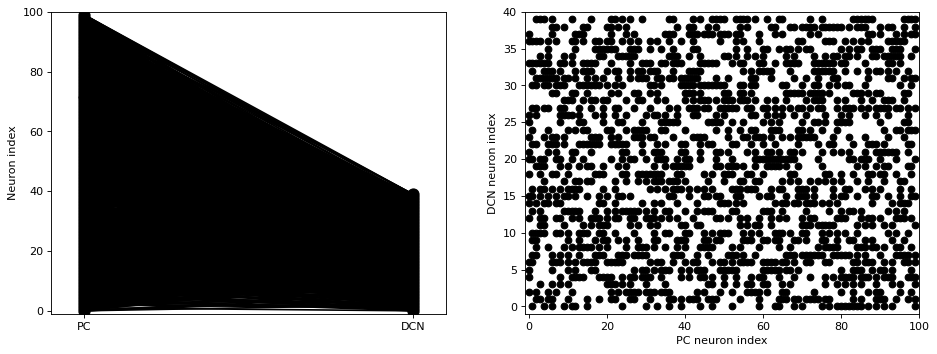

In [19]:
from General_functions import *
from Input import *
from Neurons import *
from Synapses import *
import decimal

seed_number = num_networks[0]
exp_run = exp_run_range[0]/ms
frozen_path = path_data + f'Frozen/Networks/100PC_40DCN_40IO/Seed_{seed_number}/{int(exp_run)}ms/Frozen_{int(exp_run)}ms_100PC_40DCN_40IO_Seed_{seed_number}.mat'
Frozen_data = sio.loadmat(frozen_path, squeeze_me=True)

Params, Noise_frozen, Values, Synaps = Read_Input(Frozen_data)

N_PCs_per_DCN = np.zeros(N_Cells_DCN, dtype=int) # create an array to store the number of source PCs for each DCN
for DCN_num in range(N_Cells_DCN):
    sources = np.where(Synaps.PC_DCN_Synapse_Targets == DCN_num)[0] # find the source PCs that project to this DCN
    N_PCs_per_DCN[DCN_num] = len(sources) # count the number of source PCs


print('num DCNs receiving from each PC ', N_PCs_per_DCN)
print(f'mean: {mean(N_PCs_per_DCN)}')

N_DCNs_per_PC_avg = []
N_DCNs_per_PC = np.zeros(N_Cells_PC, dtype=int) # create an array to store the number of source PCs for each DCN
for PC_num in range(N_Cells_PC):
    sources = np.where(Synaps.PC_DCN_Synapse_Sources == PC_num)[0] # find the source PCs that project to this DCN
    N_DCNs_per_PC[PC_num] = len(sources) # count the number of source PCs
    if len(sources) > 0:
        N_DCNs_per_PC_avg.append(len(sources))

print(f'num PCs projecting onto each DCN {N_DCNs_per_PC}')
print(f'mean: {mean(N_DCNs_per_PC_avg)}')


Ns = 100
Nt = 40
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Synaps.PC_DCN_Synapse_Sources, Synaps.PC_DCN_Synapse_Targets):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['PC', 'DCN'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Synaps.PC_DCN_Synapse_Sources, Synaps.PC_DCN_Synapse_Targets, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('PC neuron index');
ylabel('DCN neuron index');

num IOs receiving from each DCN  [10 11  9  7  8 11 14 11 10 13 12  9 10  9 16  9  7 10  7  9  8  9 10 10
 13  8  9  6  9 10 12  8 12 10  7 11 11  9 10 16]
mean: 10.0
num DCNs projecting onto each IO [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
mean: 10.0


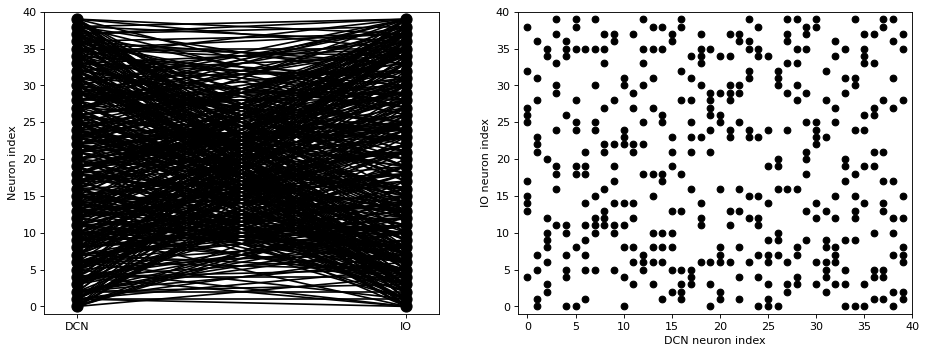

In [21]:
N_DCNs_per_IO = np.zeros(N_Cells_IO, dtype=int) # create an array to store the number of source DCNs for each IO
for IO_num in range(N_Cells_IO):
    sources = np.where(Synaps.DCN_IO_Synapse_Targets == IO_num)[0] # find the source DCNs that project to this IO
    N_DCNs_per_IO[IO_num] = len(sources) # count the number of source DCNs


print('num IOs receiving from each DCN ', N_IOs_per_IO)
print(f'mean: {mean(N_DCNs_per_IO)}')

N_IOs_per_DCN_avg = []
N_IOs_per_DCN = np.zeros(N_Cells_DCN, dtype=int) # create an array to store the number of source DCNs for each IO
for DCN_num in range(N_Cells_DCN):
    sources = np.where(Synaps.DCN_IO_Synapse_Sources == DCN_num)[0] # find the source DCNs that project to this IO
    N_IOs_per_DCN[DCN_num] = len(sources) # count the number of source DCNs
    if len(sources) > 0:
        N_IOs_per_DCN_avg.append(len(sources))

print(f'num DCNs projecting onto each IO {N_IOs_per_DCN}')
print(f'mean: {mean(N_IOs_per_DCN_avg)}')


Ns = 40
Nt = 40
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Synaps.DCN_IO_Synapse_Sources, Synaps.DCN_IO_Synapse_Targets):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['DCN', 'IO'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Synaps.DCN_IO_Synapse_Sources, Synaps.DCN_IO_Synapse_Targets, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('DCN neuron index');
ylabel('IO neuron index');

In [23]:
max(N_IOs_per_IO)

16

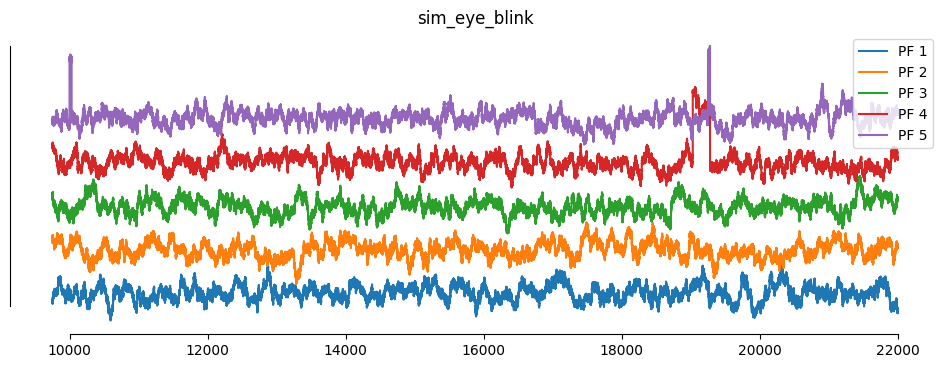

In [3]:
start = int(9750*40)
end = int(22000*40)
x_ax = linspace(int(start/40),int(end/40),int(end-start))
for sim in Parameters['simulations']:
    fig = plt.figure(figsize=(12, 4),dpi=100)
    title(f'sim_{sim}')
    y_ax = Noise_frozen.Noise_sim[f'sim_{sim}']
    for N_Noise in range(5):
        plot(x_ax,N_Noise+y_ax[N_Noise][start:end]/nA*amp,label=f'PF {N_Noise+1}')
    sns.despine(trim=True)
    yticks([])
    legend(loc='upper right')
    plt.show()

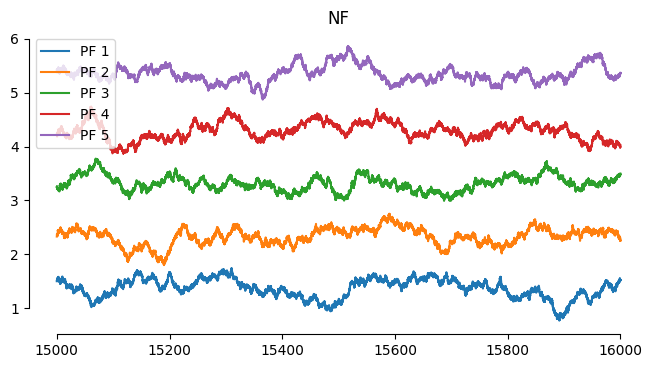

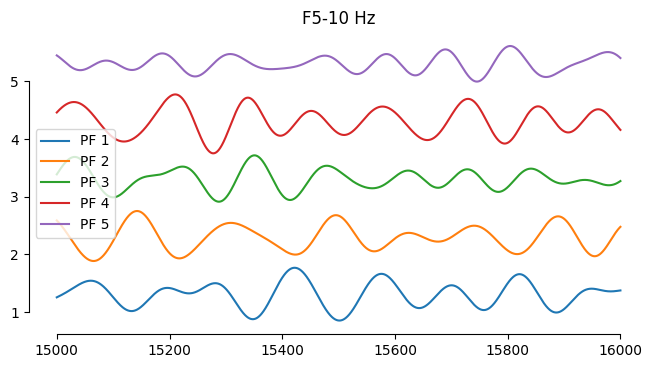

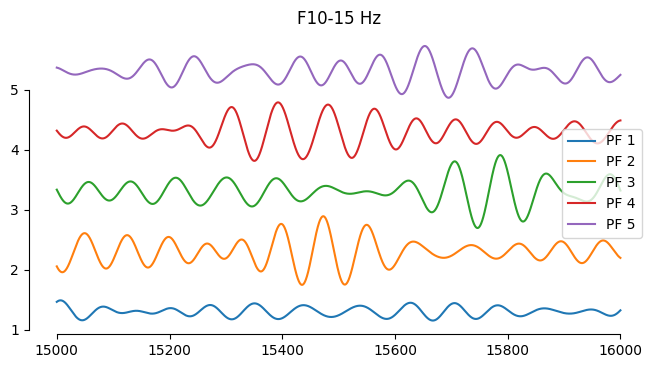

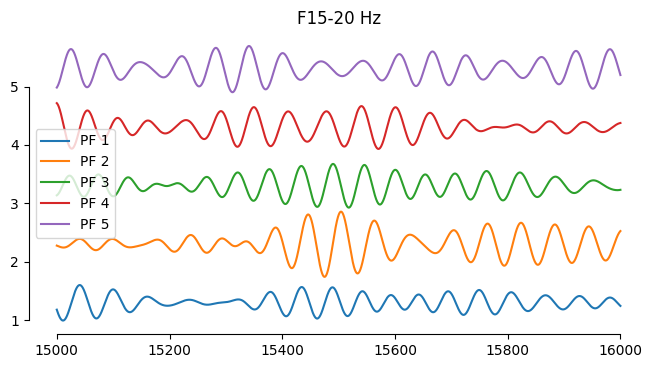

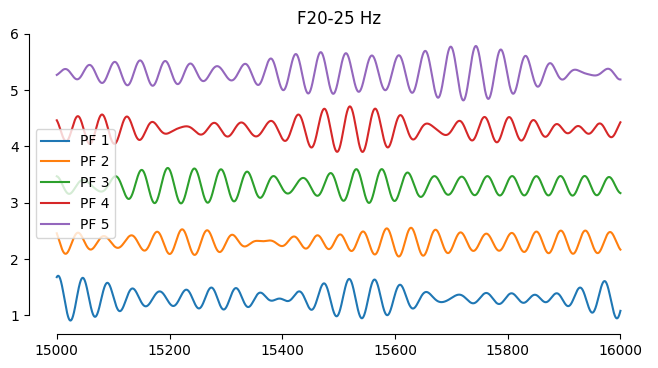

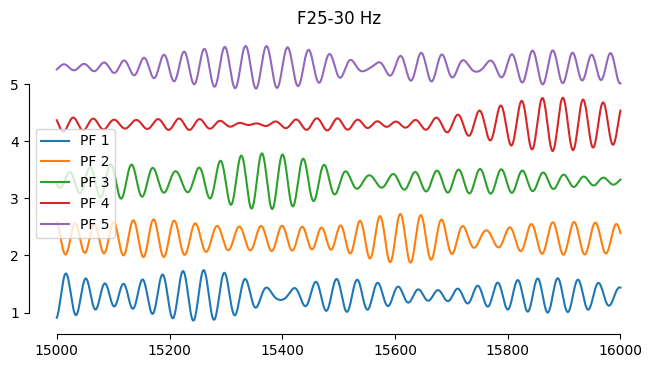

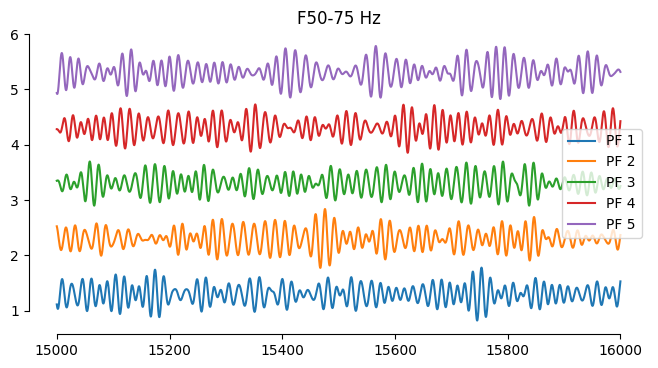

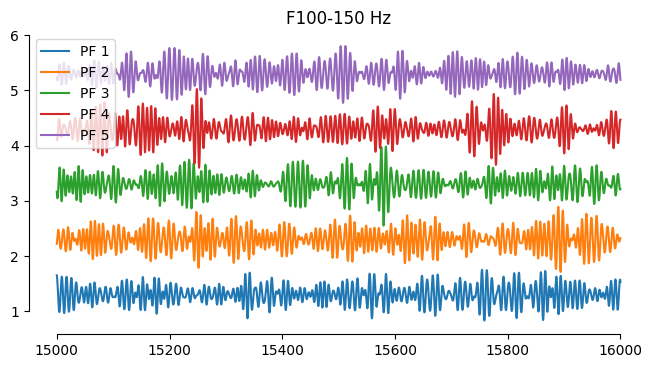

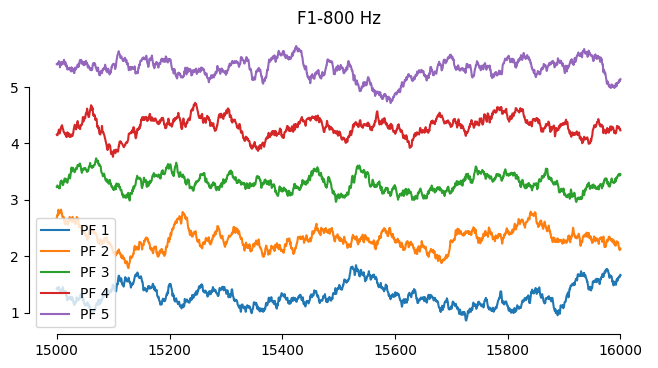

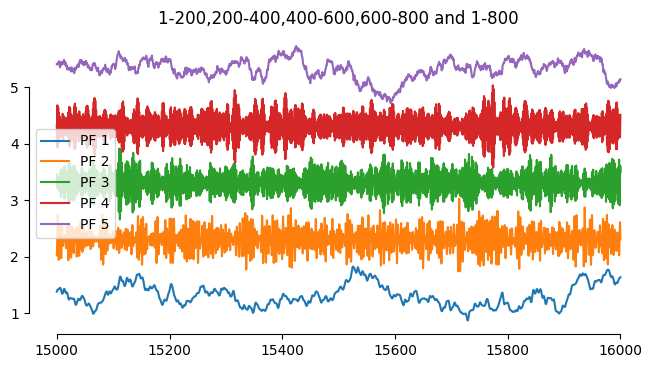

In [4]:
start = int(15000*40)
end = int(16000*40)

f0_name = {}
f0_name['0'] = 'NF'
f0_name_arr = ['NF']
for f0 in f0_range:
    step = 5
    if f0 >= 50: 
        step = 25
    if f0 >= 100: 
        step = 50
    lowcut = f0
    highcut = lowcut + step
    if f0 == 800:
        lowcut = 1
        highcut = f0 
    fname = f'F{lowcut}-{highcut} Hz'
    if f0 == 0:
        fname = f'NF'
    elif f0 == 1000:
        fname = '1-200,200-400,400-600,600-800 and 1-800'
    elif f0 == 1100:
        fname = 'Sine and original OU'
    elif f0 == 1200:
        fname = 'Sine and different filtered'
    elif f0 == 1300:
        fname = 'Sine added to OU'
    elif f0 == 1400:
        fname = 'Only sine different phases'
    elif f0 == 1500:
        fname = '5, 11, 53, 101, 199 Hz sines'
    f0_name_arr.append(fname)
    f0_name[f0] = fname

f0 = 0
fig = plt.figure(figsize=(8, 4),dpi=100)
title(f0_name['0'])
x_ax = linspace(int(start/40),int(end/40),int(end-start))
y_ax = Noise_frozen.Noise_I
for N_Noise in range(5):
    plot(x_ax,N_Noise+y_ax[N_Noise][start:end]/nA*amp,label=f'PF {N_Noise+1}')
sns.despine(trim=True)
legend()
plt.show()


for f0 in f0_range:
    fig = plt.figure(figsize=(8, 4),dpi=100)
    title(f'{f0_name[f0]}')
    y_ax = Noise_frozen.Noise_filtered[f'filtered_noise_{f0}']
    for N_Noise in range(5):
        plot(x_ax,N_Noise+y_ax[N_Noise][start:end]/nA*amp,label=f'PF {N_Noise+1}')
    sns.despine(trim=True)
    legend()
    plt.show()

num PCs receiving from each IO [9 5 5 0 5 0 0 0 0 3 0 0 0 0 0 7 2 6 0 3 0 4 0 0 0 0 0 0 4 0 9 4 2 5 9 0 3
 4 8 3]
mean: 5.0
num IOs projecting onto each PC [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
mean: 1.0


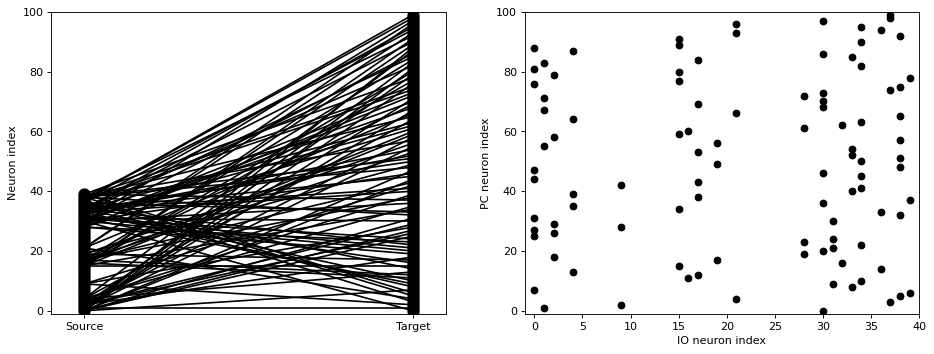

In [5]:
Params, Noise_frozen, Values, Synaps = Read_Input(Frozen_data)
N_PCs_per_IO_avg = []
N_PCs_per_IO = np.zeros(N_Cells_IO, dtype=int) # create an array to store the number of source PCs for each DCN
for IO_num in range(N_Cells_IO):
    sources = np.where(Synaps.IO_PC_Synapse_Sources == IO_num)[0] # find the source PCs that project to this DCN
    N_PCs_per_IO[IO_num] = len(sources) # count the number of source PCs
    if len(sources) > 0:
        N_PCs_per_IO_avg.append(len(sources))

print(f'num PCs receiving from each IO {N_PCs_per_IO}')
print(f'mean: {mean(N_PCs_per_IO_avg)}')

N_IOs_per_PC_avg = []
N_IOs_per_PC = np.zeros(N_Cells_PC, dtype=int) # create an array to store the number of source PCs for each DCN
for PC_num in range(N_Cells_PC):
    sources = np.where(Synaps.IO_PC_Synapse_Targets == PC_num)[0] # find the source PCs that project to this DCN
    N_IOs_per_PC[PC_num] = len(sources) # count the number of source PCs
    if len(sources) > 0:
        N_IOs_per_PC_avg.append(len(sources))

print(f'num IOs projecting onto each PC {N_IOs_per_PC}')
print(f'mean: {mean(N_IOs_per_PC_avg)}')

Ns = N_Cells_IO
Nt = N_Cells_PC
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Synaps.IO_PC_Synapse_Sources, Synaps.IO_PC_Synapse_Targets):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['Source', 'Target'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Synaps.IO_PC_Synapse_Sources, Synaps.IO_PC_Synapse_Targets, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('IO neuron index');
ylabel('PC neuron index');

num IO receiving from each IO [10 11  9  7  8 11 14 11 10 13 12  9 10  9 16  9  7 10  7  9  8  9 10 10
 13  8  9  6  9 10 12  8 12 10  7 11 11  9 10 16]
mean: 10.0
num IOs projecting onto each IO [10 11  9  7  8 11 14 11 10 13 12  9 10  9 16  9  7 10  7  9  8  9 10 10
 13  8  9  6  9 10 12  8 12 10  7 11 11  9 10 16]
mean: 10.0


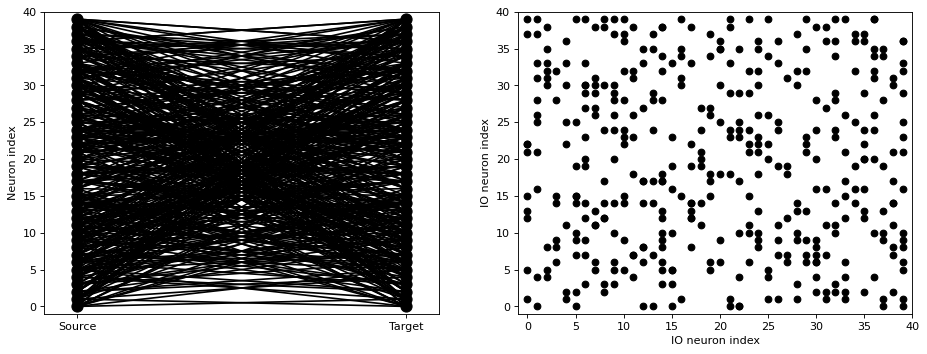

In [6]:
Params, Noise_frozen, Values, Synaps = Read_Input(Frozen_data)
N_IOs_per_IO_avg = []
N_IOs_per_IO = np.zeros(N_Cells_IO, dtype=int) # create an array to store the number of source PCs for each DCN
for IO_num in range(N_Cells_IO):
    sources = np.where(Synaps.IO_Synapse_Sources == IO_num)[0] # find the source PCs that project to this DCN
    N_IOs_per_IO[IO_num] = len(sources) # count the number of source PCs
    if len(sources) > 0:
        N_IOs_per_IO_avg.append(len(sources))

print(f'num IO receiving from each IO {N_IOs_per_IO}')
print(f'mean: {mean(N_IOs_per_IO_avg)}')

N_IOs_per_IO_avg = []
N_IOs_per_IO = np.zeros(N_Cells_IO, dtype=int) # create an array to store the number of source PCs for each DCN
for IO_num in range(N_Cells_IO):
    sources = np.where(Synaps.IO_Synapse_Targets == IO_num)[0] # find the source PCs that project to this DCN
    N_IOs_per_IO[IO_num] = len(sources) # count the number of source PCs
    if len(sources) > 0:
        N_IOs_per_IO_avg.append(len(sources))

print(f'num IOs projecting onto each IO {N_IOs_per_IO}')
print(f'mean: {mean(N_IOs_per_IO_avg)}')

Ns = N_Cells_IO
Nt = N_Cells_IO
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Synaps.IO_Synapse_Sources, Synaps.IO_Synapse_Targets):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['Source', 'Target'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Synaps.IO_Synapse_Sources, Synaps.IO_Synapse_Targets, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('IO neuron index');
ylabel('IO neuron index');

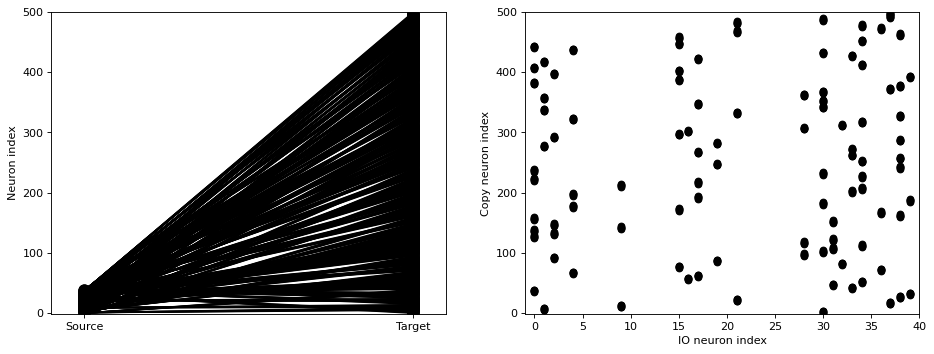

In [7]:
Ns = N_Cells_IO
Nt = Params.N_Copy
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Synaps.IO_Copy_Synapse_Sources, Params.N_Copy_order):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['Source', 'Target'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Synaps.IO_Copy_Synapse_Sources, Params.N_Copy_order, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('IO neuron index');
ylabel('Copy neuron index');

In [8]:
Synaps.IO_PC_Synapse_Sources

array([30,  1,  9, 37, 21, 38, 39,  0, 33, 31, 34, 16, 17,  4, 36, 15, 32,
       19,  2, 28, 30, 31, 34, 28, 31,  0,  2,  0,  9,  2, 31,  0, 38, 36,
       15,  4, 30, 39, 17,  4, 33, 34,  9, 17,  0, 34, 30,  0, 38, 19, 34,
       38, 33, 17, 33,  1, 19, 38,  2, 15, 16, 28, 32, 34,  4, 38, 21,  1,
       30, 17, 30,  1, 28, 30, 37, 38,  0, 15, 39,  2, 15,  0, 34,  1, 17,
       33, 30,  4,  0, 15, 34, 15, 38, 21, 36, 34, 21, 30, 37, 37])

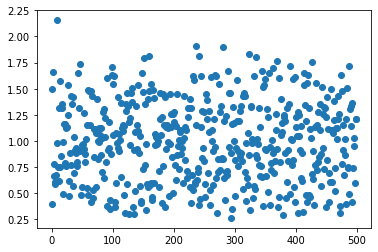

In [9]:
scatter(range(500),Synaps.Noise_PC_Synapse_Weights)

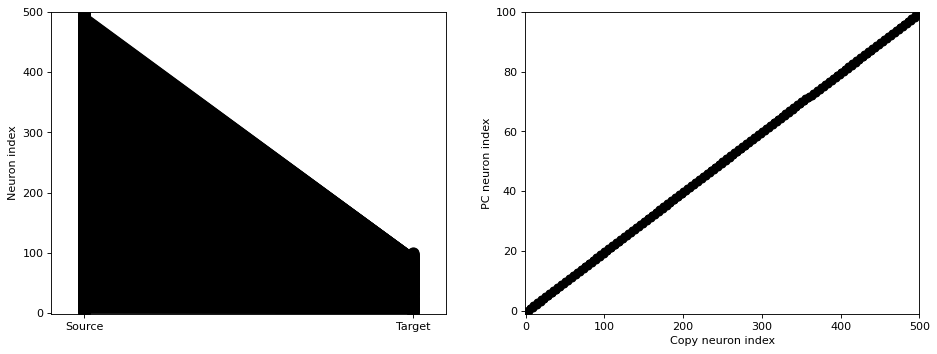

In [10]:
Ns = Params.N_Copy
Nt = N_Cells_PC
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Params.N_Copy_order, Synaps.Noise_PC_Synapse_Targets):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['Source', 'Target'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Params.N_Copy_order, Synaps.Noise_PC_Synapse_Targets, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('Copy neuron index');
ylabel('PC neuron index');

In [11]:
Synaps.Noise_PC_Synapse_Sources

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,

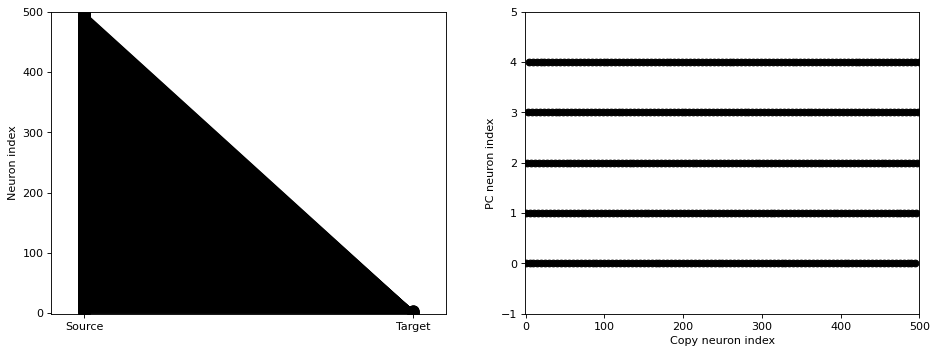

In [12]:
Ns = Params.N_Copy
Nt = N_Cells_PF
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Params.N_Copy_order, Synaps.Noise_PC_Synapse_Sources):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['Source', 'Target'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Params.N_Copy_order, Synaps.Noise_PC_Synapse_Sources, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('Copy neuron index');
ylabel('PC neuron index');

[12 10  8 13 10 13 16 12 13  8 10 10 12 10 10  8  8  6  9 10  4 10  7 10
 12 11  7  8 11  9 10  9  5  8 10 18  9 13  9 12]
mean: 10.0


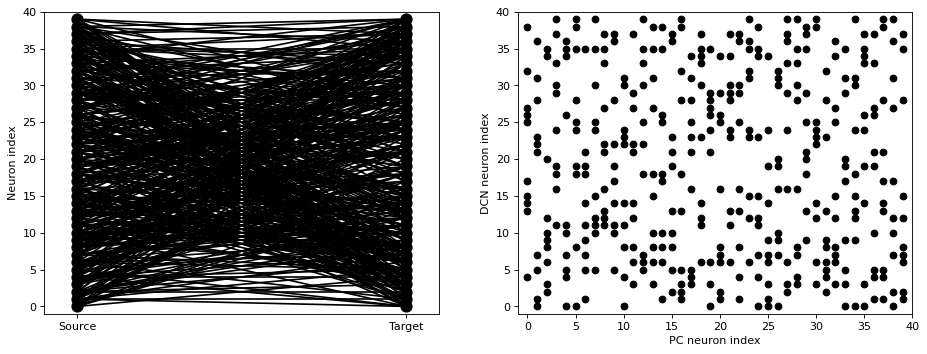

In [13]:
seed_number = num_networks[0]
exp_run = exp_run_range[0]/ms
frozen_path = path_data + f'Frozen/Networks/100PC_40DCN_40IO/Seed_{seed_number}/{int(exp_run)}ms/Frozen_{int(exp_run)}ms_100PC_40DCN_40IO_Seed_{seed_number}.mat'
Frozen_data = sio.loadmat(frozen_path, squeeze_me=True)

Params, Noise_frozen, Values, Synaps = Read_Input(Frozen_data)
N_PCs_per_DCN = np.zeros(N_Cells_DCN, dtype=int) # create an array to store the number of source PCs for each DCN
for DCN_num in range(N_Cells_DCN):
    sources = np.where(Synaps.DCN_IO_Synapse_Targets == DCN_num)[0] # find the source PCs that project to this DCN
    N_PCs_per_DCN[DCN_num] = len(sources) # count the number of source PCs


print(N_PCs_per_DCN)
print(f'mean: {mean(N_PCs_per_DCN)}')

Ns = N_Cells_DCN
Nt = N_Cells_IO
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Synaps.DCN_IO_Synapse_Sources, Synaps.DCN_IO_Synapse_Targets):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['Source', 'Target'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Synaps.DCN_IO_Synapse_Sources, Synaps.DCN_IO_Synapse_Targets, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('PC neuron index');
ylabel('DCN neuron index');

WARNING    /home/eliasmfs/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
 [py.warnings]
  return np.asarray(x, float)



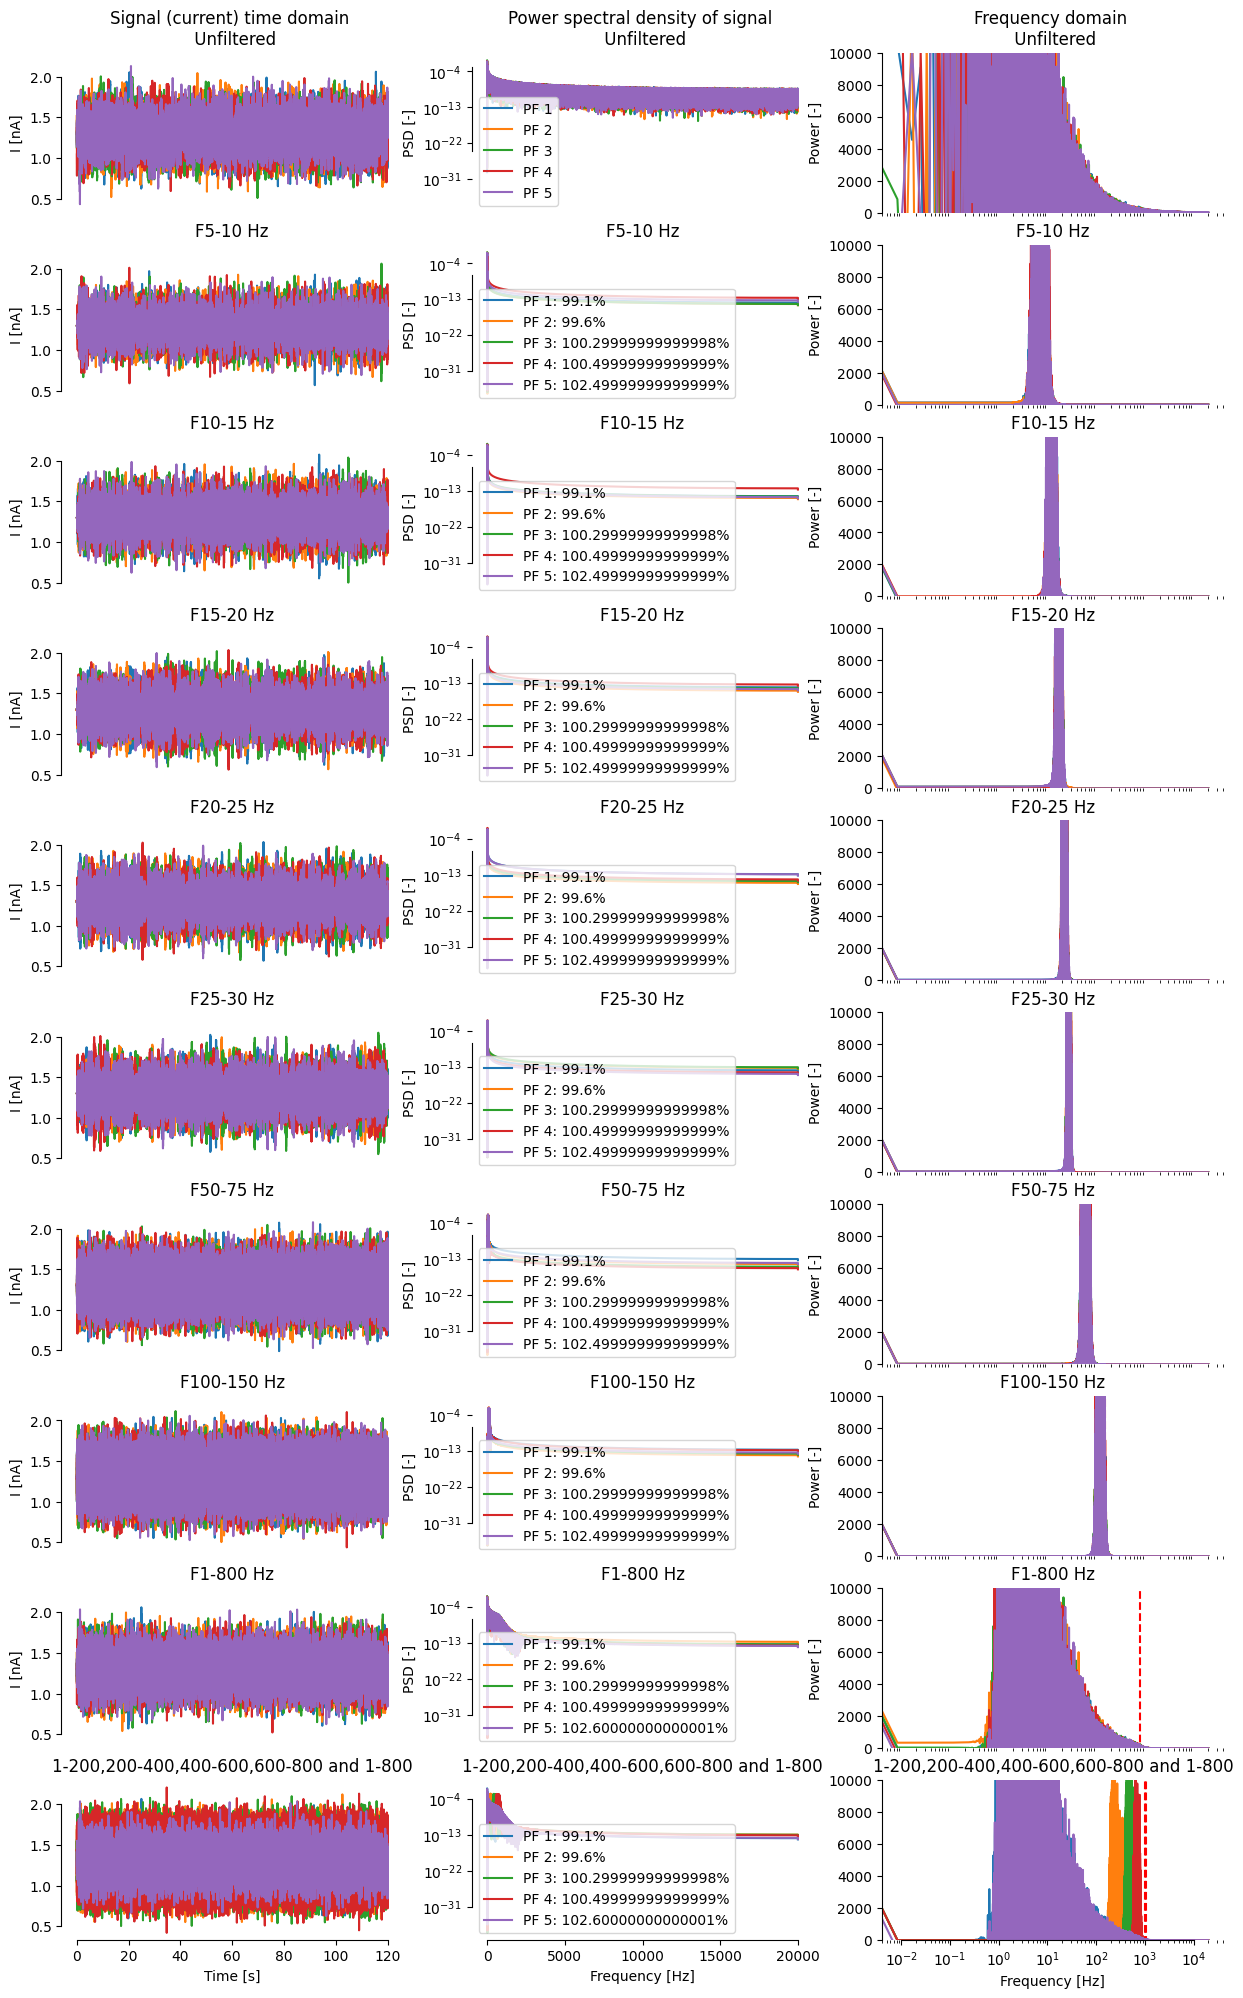

CPU times: user 53.7 s, sys: 18.6 s, total: 1min 12s
Wall time: 1min 12s


In [14]:
%%time
import numpy as np
import matplotlib.pyplot as plt
x_ax = linspace(0,int(Params.exp_run),int(Params.exp_run/Params.dt/second))
fs = 1/(Params.dt/second)
T = Params.exp_run/second
nsamples = int(T * fs)
x_ax_fr = rfftfreq(nsamples, 1 / fs)
f0_range = [5,10,15,20,25,50,100,800,1000]#,1100,1200,1300,1400,1500]
ymax=10000
f0_range.insert(0,0)
fig, axes = plt.subplots(nrows=len(f0_range), ncols=3, figsize=(15, 25),dpi=100, sharey='col', sharex='col')
energ_x = {}
for row,f0 in enumerate(f0_range):
    lowcut = f0
    step = 5
    if f0 >= 50:
        lowcut = f0
        step = 25
    if f0 >= 100:
        lowcut = f0
        step = 50
    if f0 == 800:
        lowcut = 1
        step = f0-lowcut
        
    if f0 == 0:
        y_ax = Noise_frozen.Noise_I
        name = 'Unfiltered'
    else:
        y_ax = Noise_frozen.Noise_filtered[f'filtered_noise_{f0}']
        name = f0_name[f0]
        axes[row,2].vlines(lowcut, -ymax, ymax, colors='r', linestyles='--')
        axes[row,2].vlines(lowcut+step, -ymax, ymax, colors='r', linestyles='--')
        
    if row == 0:
        axes[row,0].set_title(f'Signal (current) time domain \n {name}')
        axes[row,1].set_title(f'Power spectral density of signal \n {name}')
        axes[row,2].set_title(f'Frequency domain \n {name}')   
    else:
        axes[row,0].set_title(f'{name}')
        axes[row,1].set_title(f'{name}')
        axes[row,2].set_title(f'{name}')
        
    energ_x[f'{f0}'] = []
    for N_Noise in range(5):
        energ_x[f'{f0}'].append(round(sum(np.abs(rfft(y_ax[N_Noise]/nA))**2)/10e11,2))
        axes[row,0].plot(x_ax,y_ax[N_Noise]/nA)
        f, Pxx_den = signal.periodogram(y_ax[N_Noise]/nA, fs, scaling='density')
        name_pct = f'PF {N_Noise+1}'
        if f0 != 0:
            pct = round(energ_x['0'][N_Noise]/energ_x[f'{f0}'][N_Noise],3)
            name_pct = f'PF {N_Noise+1}: {pct*100}%'
        axes[row,1].semilogy(f, Pxx_den,label=name_pct)
        axes[row,1].legend(loc="lower left")
        axes[row,2].plot(x_ax_fr,rfft(y_ax[N_Noise]/nA))
    axes[row,2].set_xscale('log')
    axes[row,2].set_ylim([0,ymax])
    if row != len(f0_range)-1:
        axes[row,0].tick_params(bottom=False)
        axes[row,1].tick_params(bottom=False)
        axes[row,2].tick_params(bottom=False)
        axes[row,0].set_ylabel('I [nA]')
        axes[row,1].set_ylabel('PSD [-]')
        axes[row,2].set_ylabel('Power [-]')
        sns.despine(trim=True,bottom=True, left=False, ax=axes[row,0])
        sns.despine(trim=True,bottom=True, left=False, ax=axes[row,1])
        sns.despine(trim=True,bottom=True, left=False, ax=axes[row,2])
    else:
        sns.despine(trim=True,ax=axes[row,0])
        sns.despine(trim=True,ax=axes[row,1])
        sns.despine(trim=True,ax=axes[row,2])
        axes[row,0].set_xlabel('Time [s]')
        axes[row,1].set_xlabel('Frequency [Hz]') 
        axes[row,2].set_xlabel('Frequency [Hz]')   
plt.show()

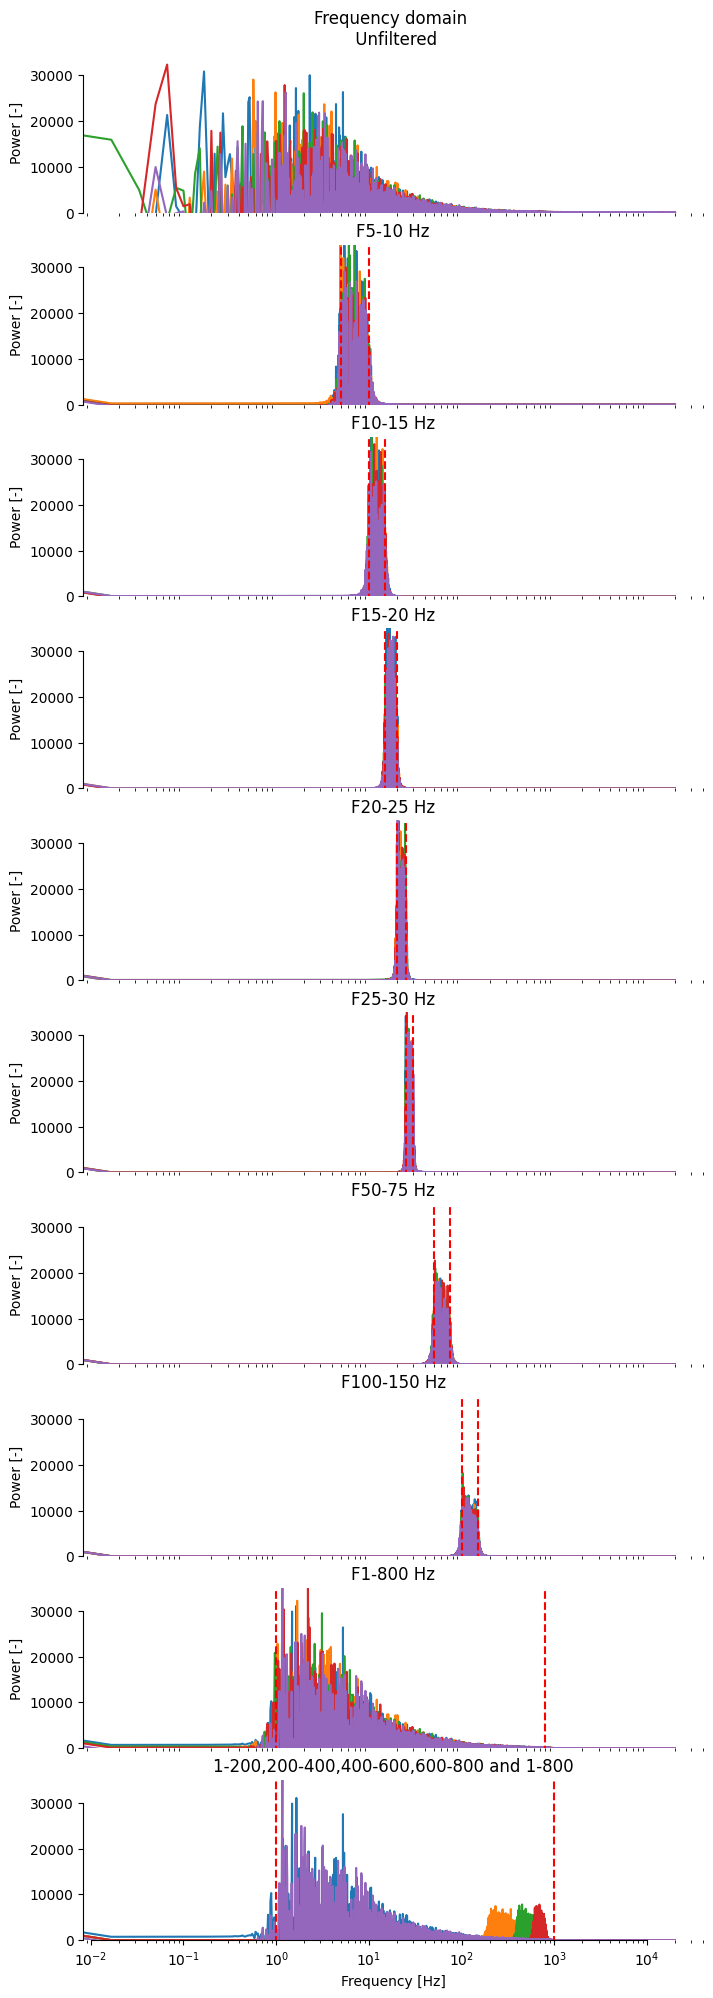

In [15]:
fs = 1/(Params.dt/second)
T = Params.exp_run/second
nsamples = int(T * fs)
x_ax = rfftfreq(nsamples, 1 / fs)
f0_range = [5,10,15,20,25,50,100,800,1000]#,1100,1200,1300,1400,1500]
f0_range.insert(0,0)
ymax = 35000
fig, axes = plt.subplots(nrows=len(f0_range), ncols=1, figsize=(8, 25),dpi=100, sharey='col', sharex='col')
energ_x = {}
for row,f0 in enumerate(f0_range):
    lowcut = f0
    step = 5
    if f0 >= 50:
        lowcut = f0
        step = 25
    if f0 >= 100:
        lowcut = f0
        step = 50
    if f0 >= 800:
        lowcut = 1
        step = f0-1
    
    if f0 == 0:
        y_ax = Noise_frozen.Noise_I
        name = 'Unfiltered'
    else:
        y_ax = Noise_frozen.Noise_filtered[f'filtered_noise_{f0}']
        name = f0_name[f0]
        
    if row == 0:
        axes[0].set_title(f'Frequency domain \n {name}')
    else:
        axes[row].set_title(f'{name}')
    axes[row].set_ylim([0,ymax])
    for N_Noise in range(5):
        axes[row].plot(x_ax,rfft(y_ax[N_Noise]/nA))
        axes[row].set_xscale('log')
    if f0 != 0:    
        axes[row].vlines(lowcut, -ymax, ymax, colors='r', linestyles='--')
        axes[row].vlines(lowcut+step, -ymax, ymax, colors='r', linestyles='--')
    if row != len(f0_range)-1:
        axes[row].tick_params(bottom=False)
        axes[row].set_ylabel('Power [-]')
        sns.despine(trim=True,bottom=True, left=False, ax=axes[row])
    else:
        sns.despine(trim=True,ax=axes[row])
        axes[row].set_xlabel('Frequency [Hz]') 

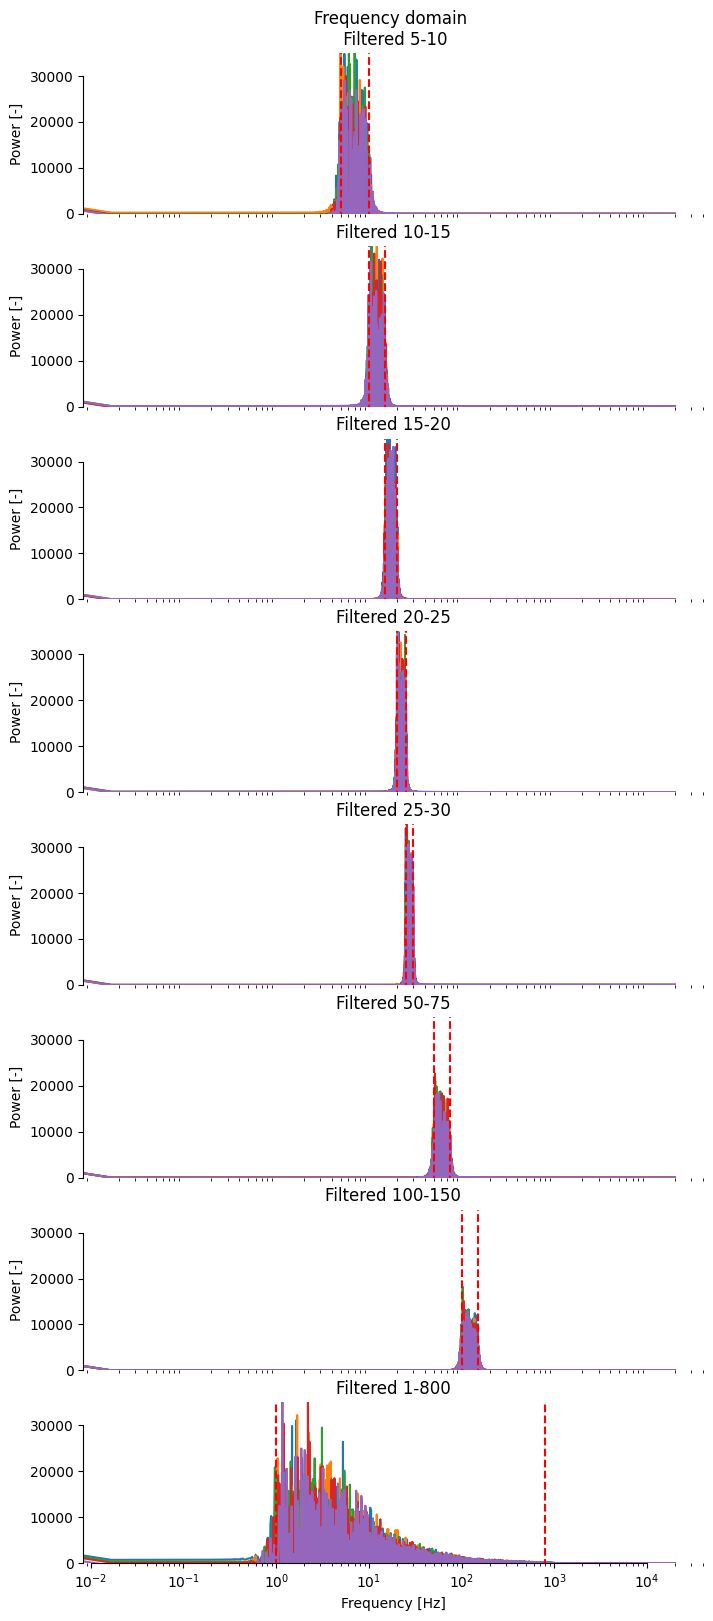

In [16]:
fs = 1/(Parameters["dt"]/second)
T = Parameters['exp_run']/second
nsamples = int(T * fs)
x_ax = rfftfreq(nsamples, 1 / fs)
f0_range = [5,10,15,20,25,50,100,800]
ymax = 35000
fig, axes = plt.subplots(nrows=len(f0_range), ncols=1, figsize=(8, 20),dpi=100, sharey='col', sharex='col')
energ_x = {}
for row,f0 in enumerate(f0_range):
    lowcut = f0
    step = 5
    if f0 >= 50:
        lowcut = f0
        step = 25
    if f0 >= 100:
        lowcut = f0
        step = 50
    if f0 == 800:
        lowcut = 1
        step = f0-lowcut
        
    y_ax = Noise_frozen.Noise_filtered[f'filtered_noise_{f0}']
    name =f'Filtered {lowcut}-{lowcut+step}'        
    if row == 0:
        axes[0].set_title(f'Frequency domain \n {name}')
    else:
        axes[row].set_title(f'{name}')
    axes[row].set_ylim([0,ymax])
    for N_Noise in range(5):
        axes[row].plot(x_ax,rfft(y_ax[N_Noise]/nA))
        axes[row].set_xscale('log')
    if f0 != 0:    
        axes[row].vlines(lowcut, -ymax, ymax, colors='r', linestyles='--')
        axes[row].vlines(lowcut+step, -ymax, ymax, colors='r', linestyles='--')
    if row != len(f0_range)-1:
        axes[row].tick_params(bottom=False)
        axes[row].set_ylabel('Power [-]')
        sns.despine(trim=True,bottom=True, left=False, ax=axes[row])
    else:
        sns.despine(trim=True,ax=axes[row])
        axes[row].set_xlabel('Frequency [Hz]') 

WARNING    /usr/lib/python3/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]
  fig.canvas.print_figure(bytes_io, **kw)



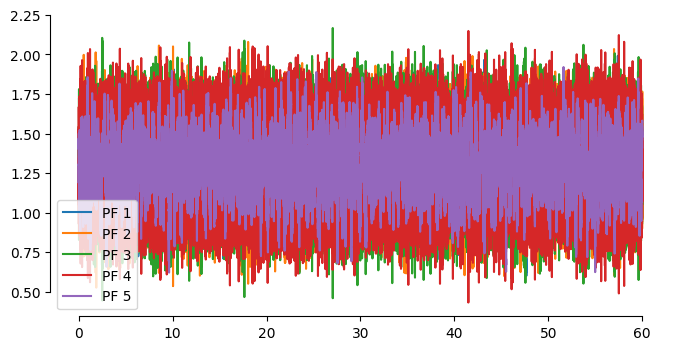

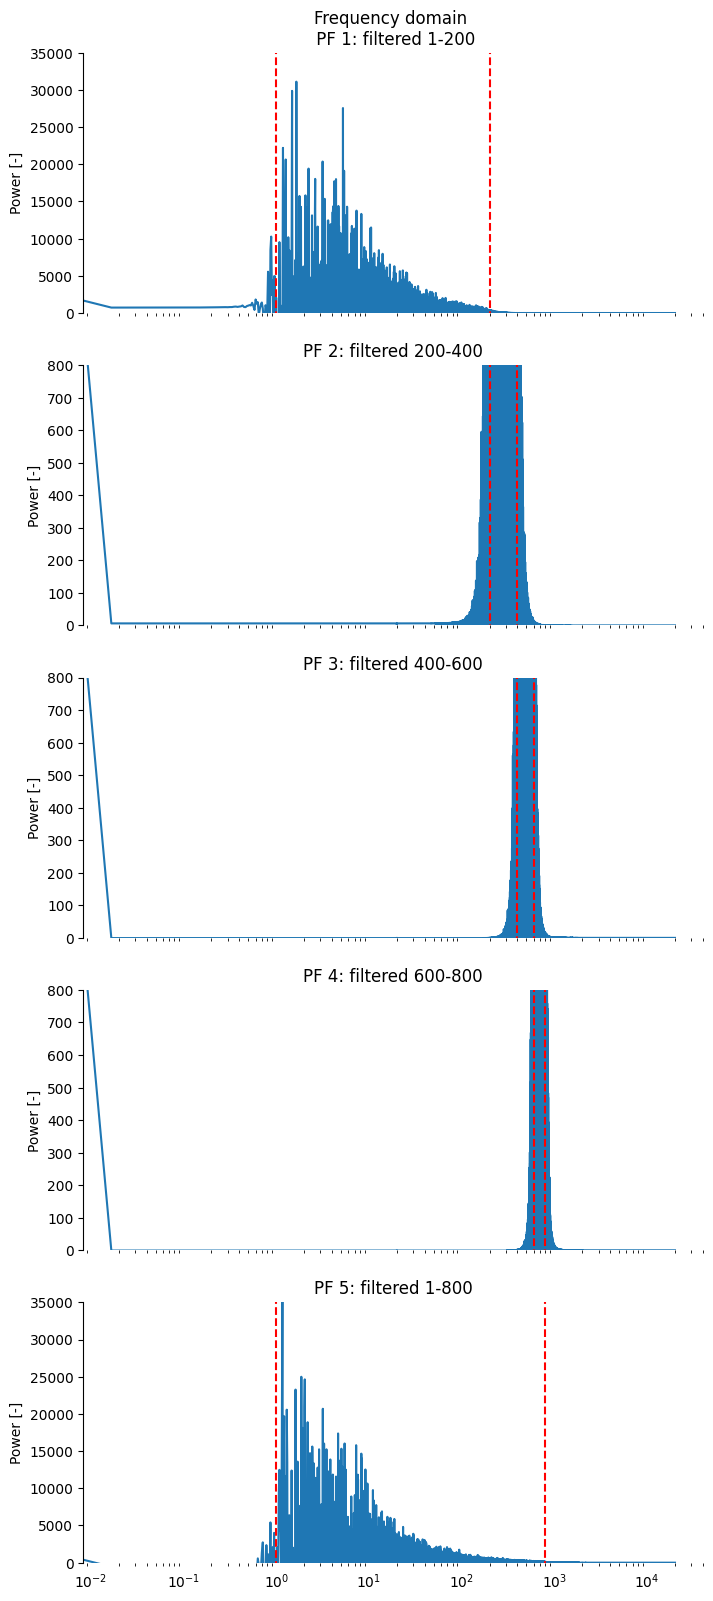

In [17]:
f0 = 1000

fig = plt.figure(figsize=(8, 4),dpi=100)
x_ax = linspace(0,int(Params.exp_run),int(Params.exp_run/Params.dt/second))
y_ax = Noise_frozen.Noise_filtered[f'filtered_noise_{f0}']
for N_Noise in range(5):
    plot(x_ax,y_ax[N_Noise]/nA,label=f'PF {N_Noise+1}')
sns.despine(trim=True)
legend()
plt.show()


fs = 1/(Parameters["dt"]/second)
T = Parameters['exp_run']/second
nsamples = int(T * fs)
x_ax = rfftfreq(nsamples, 1 / fs)

fig, axes = plt.subplots(nrows=Parameters["N_Cells_PF"], ncols=1, figsize=(8, 20),dpi=100, sharex='col')
energ_x = {}

for row,lowcut in enumerate(range(0,Parameters["N_Cells_PF"]*200,200)):
    highcut = lowcut+200
    if lowcut == 0: lowcut = 1
    if lowcut == Parameters["N_Cells_PF"]*200-200:
        highcut = lowcut
        lowcut = 1
    y_ax = Noise_frozen.Noise_filtered[f'filtered_noise_{f0}']
    name = f'PF {row+1}: filtered {lowcut}-{highcut}'        
    if row == 0:
        axes[0].set_title(f'Frequency domain \n {name}')
    else:
        axes[row].set_title(f'{name}')
    if  0 < row < 4: ymax = 800
    else: ymax = 35000
    axes[row].set_ylim([0,ymax])
    axes[row].plot(x_ax,rfft(y_ax[row]/nA))
    axes[row].set_xscale('log')
    if f0 != 0:    
        axes[row].vlines(lowcut, -ymax, ymax, colors='r', linestyles='--')
        axes[row].vlines(highcut, -ymax, ymax, colors='r', linestyles='--')
    if row != len(f0_range)-1:
        axes[row].tick_params(bottom=False)
        axes[row].set_ylabel('Power [-]')
        sns.despine(trim=True,bottom=True, left=False, ax=axes[row])
    else:
        sns.despine(trim=True,ax=axes[row])
        axes[row].set_xlabel('Frequency [Hz]') 

In [18]:
# b2.device.delete(force=True)